# Dual Stream Relational Simulation
This notebook simulates relational token memory and saves results to JSON with timestamps.

In [9]:
import json
import os
import pandas as pd
from collections import defaultdict
from datetime import datetime
import matplotlib.pyplot as plt


In [10]:
def compute_relational_weights(user_stream, ai_stream):
    from collections import Counter
    import pandas as pd

    user_tokens = " ".join(user_stream).lower().split()
    ai_tokens = " ".join(ai_stream).lower().split()

    user_counts = Counter(user_tokens)
    ai_counts = Counter(ai_tokens)

    all_tokens = sorted(set(user_counts.keys()).union(ai_counts.keys()))
    data = []

    for token in all_tokens:
        data.append({
            "token": token,
            "user_weight": user_counts.get(token, 0) / len(user_tokens),
            "ai_weight": ai_counts.get(token, 0) / len(ai_tokens)
        })

    return pd.DataFrame(data)


In [11]:
# Define user and AI streams
user_stream = [
    "Let's run all of today's content through the simulation.",
    "Should we build a new repo or just add to the existing one?",
    "I'm wondering what you think about capturing both sides of the conversation.",
    "Feels like an evolution of what we started with."
]

ai_stream = [
    "Yes, we can simulate relational salience over time.",
    "Let's extend the existing token memory layer with relational weighting.",
    "Capturing both sides gives us insight into mirrored salience and drift.",
    "Agreed. This belongs in the same repo with an upgraded README."
]


In [12]:
import json
import os
from datetime import datetime

# Generate weights first
df_weights = compute_relational_weights(user_stream, ai_stream)

# Save weights to JSON file with timestamp
json_file = "relational_weights.json"
timestamp = datetime.now().isoformat()

session_data = {
    "timestamp": timestamp,
    "weights": df_weights.to_dict(orient="records")
}

# Load existing data or initialize
if os.path.exists(json_file):
    try:
        with open(json_file, "r") as f:
            existing_data = json.load(f)
        if not isinstance(existing_data, list):
            existing_data = []
    except json.JSONDecodeError:
        existing_data = []
else:
    existing_data = []

# Append new session data
existing_data.append(session_data)

# Save back to JSON
with open(json_file, "w") as f:
    json.dump(existing_data, f, indent=2)

# Show preview
df_weights.head()


,token,user_weight,ai_weight
0,a,0.023256,0.000
1,about,0.023256,0.000
2,add,0.023256,0.000
3,agreed.,0.000000,0.025
4,all,0.023256,0.000


In [24]:
# Simple weighting function
def tokenize_and_weight(stream, label, boost=1.0):
    weights = defaultdict(float)
    for i, sentence in enumerate(stream):
        tokens = sentence.lower().split()
        for j, token in enumerate(tokens):
            weights[f"{label}:{token}"] += 1.0 / (j + 1) * boost
    return weights

user_weights = tokenize_and_weight(user_stream, "USER", boost=1.2)
ai_weights = tokenize_and_weight(ai_stream, "AI", boost=1.0)

# Combine weights
relational_weights = {token: (user_weights.get(token, 0), ai_weights.get(token, 0))
                      for token in set(user_weights) | set(ai_weights)}


In [25]:
df_weights = pd.DataFrame([
    {"token": token, "user_weight": uw, "ai_weight": aw}
    for token, (uw, aw) in relational_weights.items()
])
df_weights


,token,user_weight,ai_weight
0,USER:like,0.600000,0.000000
1,USER:repo,0.200000,0.000000
2,AI:an,0.000000,0.111111
3,USER:simulation.,0.133333,0.000000
4,USER:of,0.660000,0.000000
...,...,...,...
68,USER:new,0.240000,0.000000
69,AI:into,0.000000,0.142857
70,AI:both,0.000000,0.500000
71,AI:mirrored,0.000000,0.125000


In [26]:
import json
from datetime import datetime

# Prepare session data
session_data = {
    "timestamp": datetime.now().isoformat(),
    "user_stream": user_stream,
    "ai_stream": ai_stream,
    "weights": df_weights.to_dict(orient="records")
}

# JSON file path
json_file = "relational_weights.json"

# Read existing data or initialize list
try:
    with open(json_file, "r") as f:
        existing_data = json.load(f)
        if not isinstance(existing_data, list):
            existing_data = [existing_data]
except FileNotFoundError:
    existing_data = []

# Append new session data
existing_data.append(session_data)

# Write back to JSON
with open(json_file, "w") as f:
    json.dump(existing_data, f, indent=2)


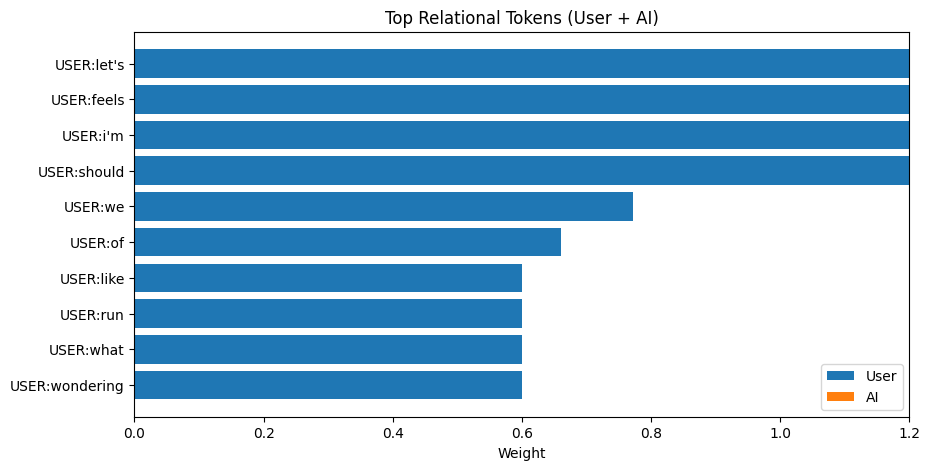

In [27]:
# Plot top weighted tokens
top_tokens = df_weights.sort_values(by=["user_weight", "ai_weight"], ascending=False).head(10)
plt.figure(figsize=(10, 5))
plt.barh(top_tokens["token"], top_tokens["user_weight"], label="User")
plt.barh(top_tokens["token"], top_tokens["ai_weight"], left=top_tokens["user_weight"], label="AI")
plt.xlabel("Weight")
plt.title("Top Relational Tokens (User + AI)")
plt.legend()
plt.gca().invert_yaxis()
plt.show()


In [28]:
for i, (u, a) in enumerate(zip(user_stream, ai_stream)):
    print(f"{i+1}. USER: {u}")
    print(f"   AI  : {a}")


1. USER: Let's run all of today's content through the simulation.
   AI  : Yes, we can simulate relational salience over time.
2. USER: Should we build a new repo or just add to the existing one?
   AI  : Let's extend the existing token memory layer with relational weighting.
3. USER: I'm wondering what you think about capturing both sides of the conversation.
   AI  : Capturing both sides gives us insight into mirrored salience and drift.
4. USER: Feels like an evolution of what we started with.
   AI  : Agreed. This belongs in the same repo with an upgraded README.


In [29]:
print(df_weights)


               token  user_weight  ai_weight
0          USER:like     0.600000   0.000000
1          USER:repo     0.200000   0.000000
2              AI:an     0.000000   0.111111
3   USER:simulation.     0.133333   0.000000
4            USER:of     0.660000   0.000000
..               ...          ...        ...
68          USER:new     0.240000   0.000000
69           AI:into     0.000000   0.142857
70           AI:both     0.000000   0.500000
71       AI:mirrored     0.000000   0.125000
72           USER:to     0.120000   0.000000

[73 rows x 3 columns]


In [ ]:

import matplotlib.pyplot as plt

# Plot user weights
plt.figure(figsize=(10, 6))
df_weights[df_weights['user_weight'] > 0].sort_values(by="user_weight", ascending=False).plot(
    kind="bar", x="token", y="user_weight", color="blue", legend=False
)
plt.title("User Token Weights")
plt.ylabel("Weight")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [ ]:

# Plot AI weights
plt.figure(figsize=(10, 6))
df_weights[df_weights['ai_weight'] > 0].sort_values(by="ai_weight", ascending=False).plot(
    kind="bar", x="token", y="ai_weight", color="green", legend=False
)
plt.title("AI Token Weights")
plt.ylabel("Weight")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
